In [1]:
import numpy as np
import pandas as pd

In [2]:
from hichew.calling import boundaries, domains, clusters
from hichew.compute import normalize, d_scores, insulation_scores, silhouette

In [3]:
from hichew.loader import cool_files

In [4]:
from hichew.plot import clusters_dynamics, viz_opt_curves, viz_tads, _pca, _tsne

In [5]:
%matplotlib inline

### Load cool files:

In [6]:
matrices, coolers = cool_files('./SMTB_data/', resolution=5000, chromnames=['chrX'])

INFO:root:LOADER|COOL_FILES| List of coolfiles of interest: ['./SMTB_data/mitotic_nuclear_cycle_1-14_repl_merged_5kb.mcool', './SMTB_data/nuclear_cycle_14_triptolide_injected_repl_merged_5kb.mcool', './SMTB_data/nuclear_cycle_14_alpha_amanitin_injected_repl_merged_5kb.mcool', './SMTB_data/nuclear_cycle_13_repl_merged_5kb.mcool', './SMTB_data/nuclear_cycle_14_water_injected_repl_merged_5kb.mcool', './SMTB_data/nuclear_cycle_12_repl_merged_5kb.mcool', './SMTB_data/nuclear_cycle_14_repl_merged_5kb.mcool', './SMTB_data/3-4h_repl_merged_5kb.mcool', './SMTB_data/nuclear_cycle_14_sh_zld_repl_merged_5kb.mcool']
INFO:root:LOADER|COOL_FILES| Start loading coolfiles...
INFO:root:LOADER|COOL_FILES| Loading completed in 0m 6s


In [7]:
matrices.keys()

dict_keys(['mitotic_nuclear_cycle_1-14_repl_merged_5kb', 'nuclear_cycle_14_triptolide_injected_repl_merged_5kb', 'nuclear_cycle_14_alpha_amanitin_injected_repl_merged_5kb', 'nuclear_cycle_13_repl_merged_5kb', 'nuclear_cycle_14_water_injected_repl_merged_5kb', 'nuclear_cycle_12_repl_merged_5kb', 'nuclear_cycle_14_repl_merged_5kb', '3-4h_repl_merged_5kb', 'nuclear_cycle_14_sh_zld_repl_merged_5kb'])

# TAD boundaries

### Call boundaries:

In [78]:
BOUNDARIES_df, BOUNDARIES_df_opt, \
BOUNDARIES_stats, BOUNDARIES_opt_windows = boundaries(matrices, coolers, label='3-4h_repl_merged_5kb', 
                                                      expected_tad_size=60000, chromnames=['chrX'], 
                                                      filtration='custom', bs_thresholds={'3-4h_repl_merged_5kb': 0.35})

INFO:root:CALL|BOUNDARIES| Start search optimal annotation...
INFO:root:CALL|BOUNDARIES| Start chromosome chrX
INFO:root:CALL|BOUNDARIES| For chromosome chrX with 4709 bins we have 4300 good bins and expected count of TADs (according to expected TAD size) of 358.0
INFO:root:CALL|BOUNDARIES| Run TAD boundaries search using windows grid for chromosome chrX...
INFO:root:CALL|BOUNDARIES| Run TAD boundaries search for boundary strength threshold 0.35...
INFO:root:CALL|BOUNDARIES| Found optimal window for chrm chrX and boundary strength threshold 0.35: 55000
INFO:root:CALL|BOUNDARIES| End boundary strength threshold 0.35
INFO:root:CALL|BOUNDARIES| For stage 3-4h_repl_merged_5kb for chrom chrX boundary strength percentile is 0.35
INFO:root:CALL|BOUNDARIES| End chromosome chrX
INFO:root:CALL|BOUNDARIES| Searching optimal segmentation completed in 0h 0m 13s


In [79]:
BOUNDARIES_df_opt.shape

(255, 7)

### Visualize opt curves:

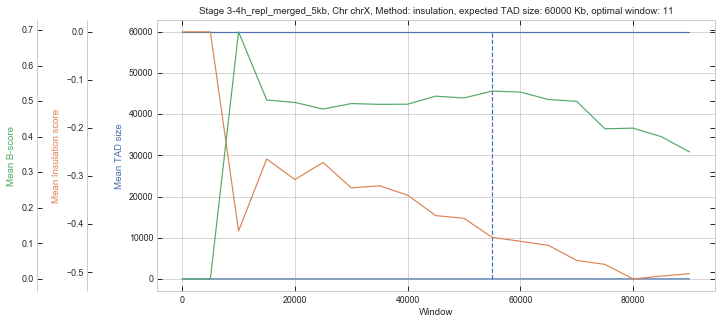

In [80]:
viz_opt_curves(BOUNDARIES_stats, BOUNDARIES_df_opt, method='insulation', chromnames=['chrX'], expected_mts=60000, stage='3-4h_repl_merged_5kb')

### Visualize boundaries:

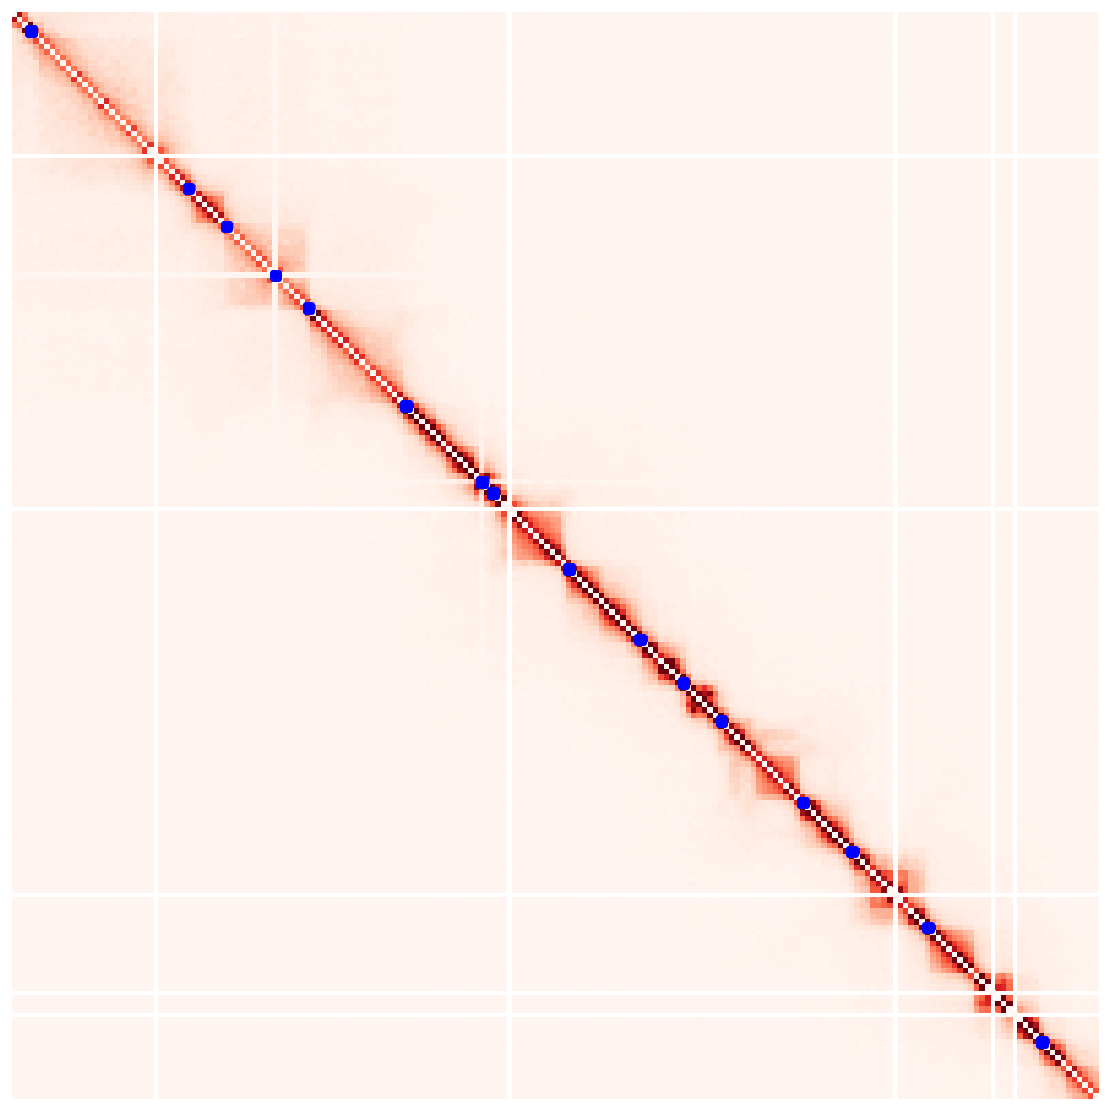

In [81]:
viz_tads(BOUNDARIES_df_opt, matrices, begin=300, end=500, ch='chrX', exp='3-4h_repl_merged_5kb', 
         resolution=5000, is_insulation=True, percentile=99.99)

### Compute insulation scores:

In [82]:
stages_embryo = ['nuclear_cycle_12_repl_merged_5kb', 'nuclear_cycle_13_repl_merged_5kb', 'nuclear_cycle_14_repl_merged_5kb', '3-4h_repl_merged_5kb']

In [83]:
BOUNDARIES_scores = insulation_scores(BOUNDARIES_df_opt, coolers, stages=stages_embryo, chromnames=['chrX'])

INFO:root:COMPUTE|INSULATION_SCORES| Start computing insulation scores...
INFO:root:COMPUTE|INSULATION_SCORES| Complete computing insulation scores in 0m 4s


In [84]:
BOUNDARIES_scores.head()

,bgn,end,bs_threshold,window,ch,insulation_score,boundary_strength,ins_score_nuclear_cycle_12_repl_merged_5kb,ins_score_nuclear_cycle_13_repl_merged_5kb,ins_score_nuclear_cycle_14_repl_merged_5kb,ins_score_3-4h_repl_merged_5kb
0,360000,365000,0.35,55000,chrX,-0.177753,0.806826,-0.043293,-0.155031,-0.157465,-0.177753
1,405000,410000,0.35,55000,chrX,0.131668,0.446903,-0.095739,-0.099755,0.217987,0.131668
2,485000,490000,0.35,55000,chrX,-0.087963,0.243883,0.080756,-0.014030,0.002123,-0.087963
3,525000,530000,0.35,55000,chrX,-0.451690,1.222621,-0.010109,-0.195549,-0.301537,-0.451690
4,615000,620000,0.35,55000,chrX,-0.499510,1.234066,-0.178150,-0.256480,-0.277632,-0.499510


### Normalize insulation scores:

In [85]:
BOUNDARIES_scores_norm = normalize(BOUNDARIES_scores, ['ins_score_{}'.format(x) for x in stages_embryo], type_norm='log-row')

In [86]:
BOUNDARIES_scores_norm.head()

,bgn,end,bs_threshold,window,ch,insulation_score,boundary_strength,ins_score_nuclear_cycle_12_repl_merged_5kb,ins_score_nuclear_cycle_13_repl_merged_5kb,ins_score_nuclear_cycle_14_repl_merged_5kb,ins_score_3-4h_repl_merged_5kb,norm_ins_score_nuclear_cycle_12_repl_merged_5kb,norm_ins_score_nuclear_cycle_13_repl_merged_5kb,norm_ins_score_nuclear_cycle_14_repl_merged_5kb,norm_ins_score_3-4h_repl_merged_5kb
0,360000,365000,0.35,55000,chrX,-0.177753,0.806826,-0.043293,-0.155031,-0.157465,-0.177753,0.126157,0.022467,0.020085,0.000000
1,405000,410000,0.35,55000,chrX,0.131668,0.446903,-0.095739,-0.099755,0.217987,0.131668,0.004008,0.000000,0.275920,0.208171
2,485000,490000,0.35,55000,chrX,-0.087963,0.243883,0.080756,-0.014030,0.002123,-0.087963,0.155908,0.071328,0.086256,0.000000
3,525000,530000,0.35,55000,chrX,-0.451690,1.222621,-0.010109,-0.195549,-0.301537,-0.451690,0.365740,0.228044,0.139894,0.000000
4,615000,620000,0.35,55000,chrX,-0.499510,1.234066,-0.178150,-0.256480,-0.277632,-0.499510,0.278662,0.217552,0.200390,0.000000


### Call clusters:

In [87]:
BOUNDARIES_clustering = clusters(BOUNDARIES_scores_norm, ['norm_ins_score_{}'.format(x) for x in stages_embryo], 
                                 method='kmeans', n_clusters=3)

In [88]:
BOUNDARIES_clustering.head()

,bgn,end,bs_threshold,window,ch,insulation_score,boundary_strength,ins_score_nuclear_cycle_12_repl_merged_5kb,ins_score_nuclear_cycle_13_repl_merged_5kb,ins_score_nuclear_cycle_14_repl_merged_5kb,ins_score_3-4h_repl_merged_5kb,norm_ins_score_nuclear_cycle_12_repl_merged_5kb,norm_ins_score_nuclear_cycle_13_repl_merged_5kb,norm_ins_score_nuclear_cycle_14_repl_merged_5kb,norm_ins_score_3-4h_repl_merged_5kb,cluster_kmeans
0,360000,365000,0.35,55000,chrX,-0.177753,0.806826,-0.043293,-0.155031,-0.157465,-0.177753,0.126157,0.022467,0.020085,0.000000,1
1,405000,410000,0.35,55000,chrX,0.131668,0.446903,-0.095739,-0.099755,0.217987,0.131668,0.004008,0.000000,0.275920,0.208171,1
2,485000,490000,0.35,55000,chrX,-0.087963,0.243883,0.080756,-0.014030,0.002123,-0.087963,0.155908,0.071328,0.086256,0.000000,1
3,525000,530000,0.35,55000,chrX,-0.451690,1.222621,-0.010109,-0.195549,-0.301537,-0.451690,0.365740,0.228044,0.139894,0.000000,0
4,615000,620000,0.35,55000,chrX,-0.499510,1.234066,-0.178150,-0.256480,-0.277632,-0.499510,0.278662,0.217552,0.200390,0.000000,0


### Evaluate clustering:

In [89]:
silhouette(BOUNDARIES_clustering, ['norm_ins_score_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

0.38097749849499557

### Visualize clusters:

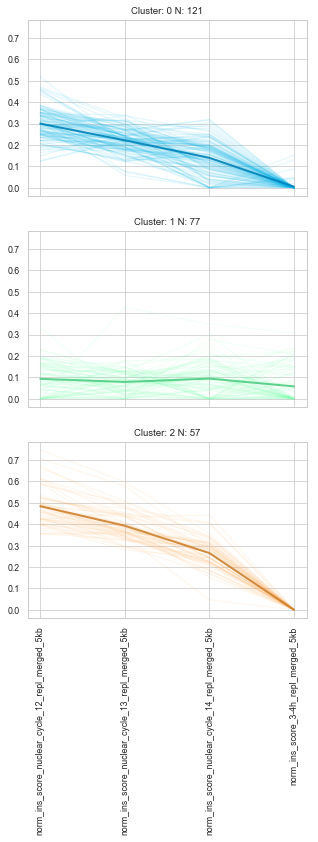

In [90]:
colors = clusters_dynamics(BOUNDARIES_clustering, ['norm_ins_score_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

INFO:root:PLOT|PCA| Explained variation per principal component: [0.79261891 0.13554614 0.04146315]


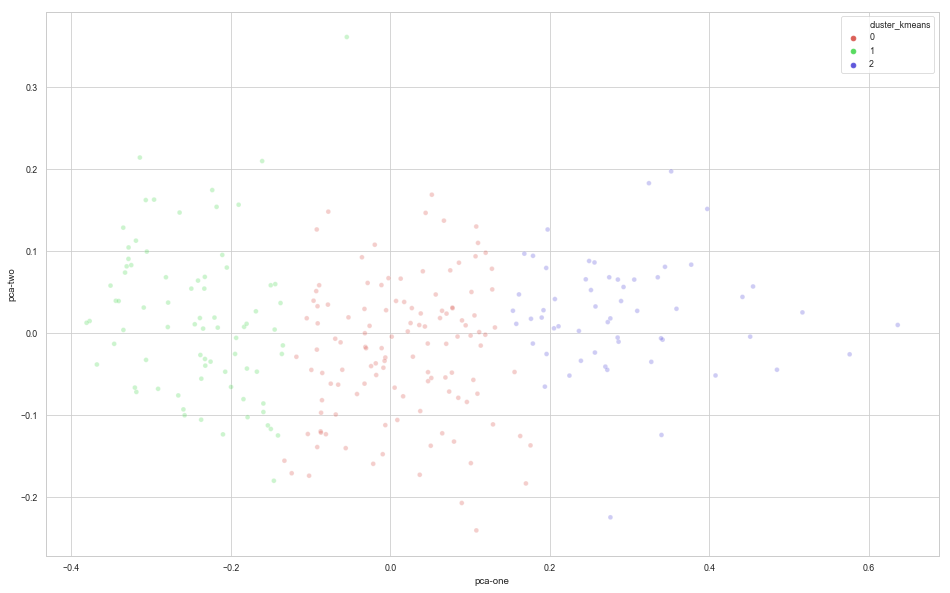

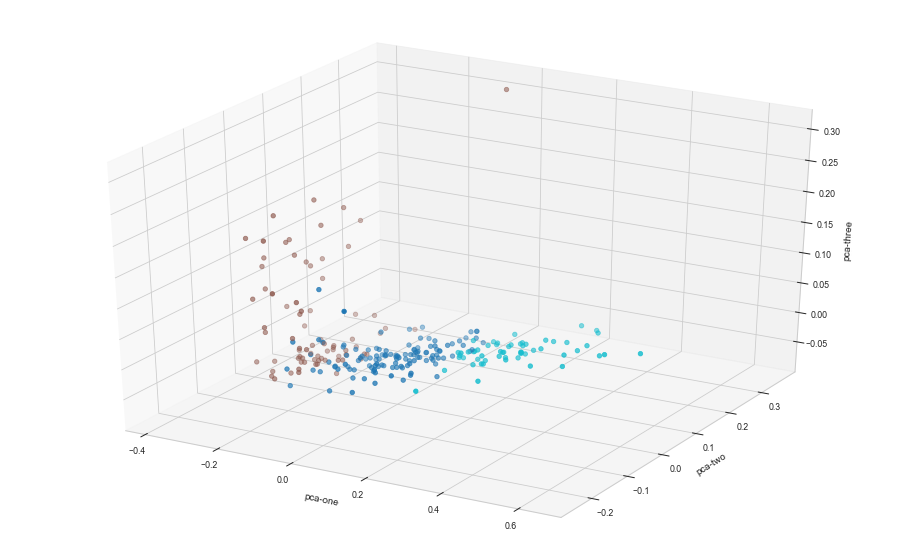

In [91]:
_pca(BOUNDARIES_clustering, ['norm_ins_score_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

INFO:root:PLOT|TSNE| t-SNE done! Time elapsed: 0.9414370059967041 seconds


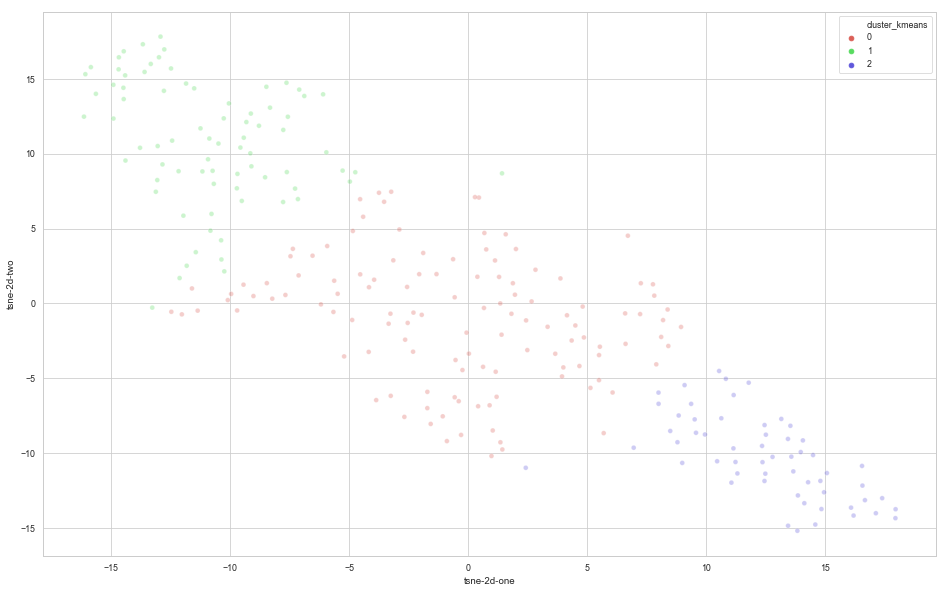

In [92]:
_tsne(BOUNDARIES_clustering, ['norm_ins_score_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

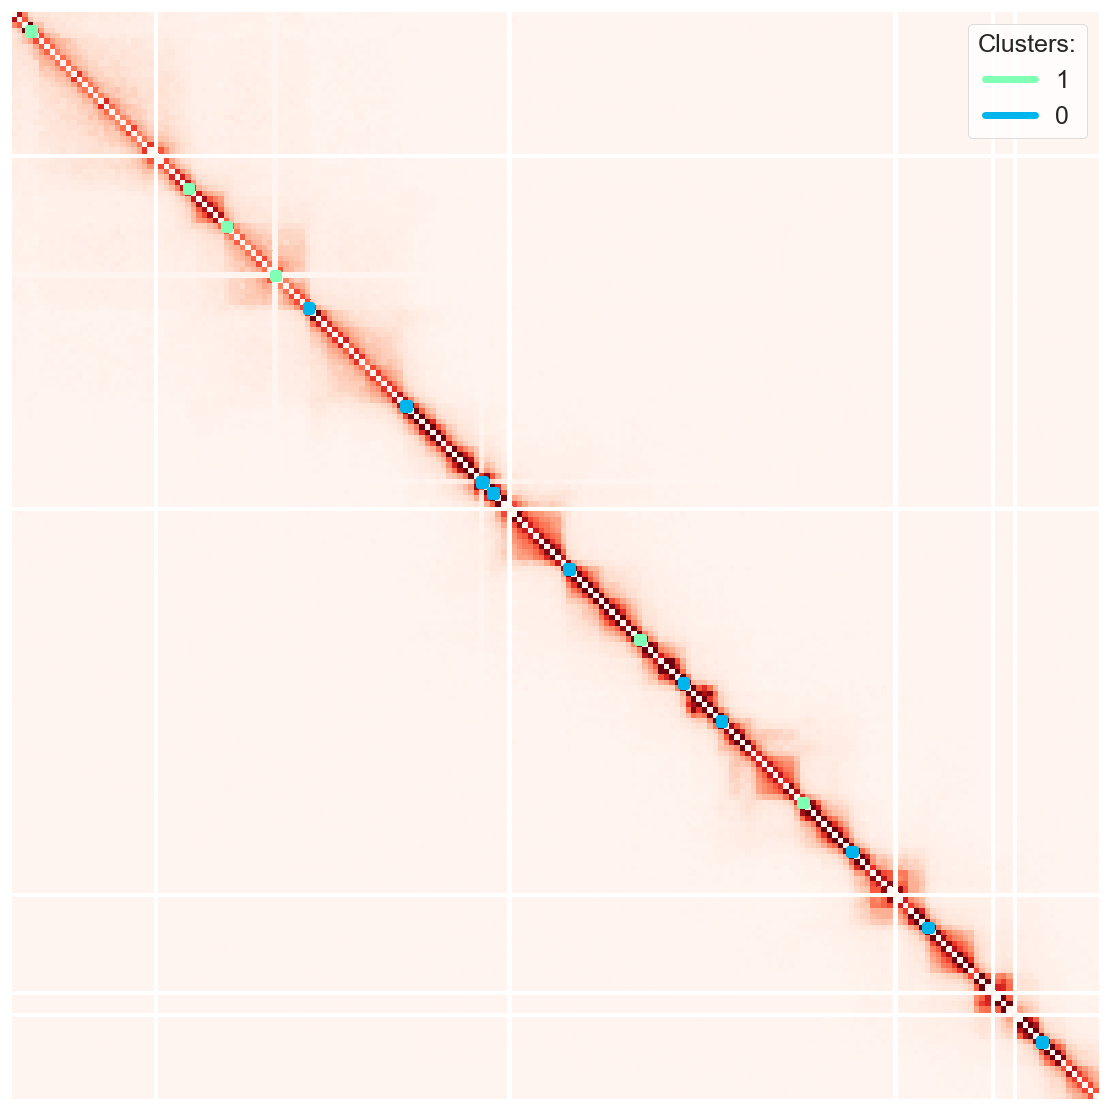

In [93]:
viz_tads(BOUNDARIES_clustering, matrices, begin=300, end=500, ch='chrX', exp='3-4h_repl_merged_5kb', 
         resolution=5000, method='kmeans', is_insulation=True, clusters=True, colors=colors, percentile=99.99)

# TADs

### Call TADs:

In [27]:
TADs_stats, TADs_df, TADs_df_opt = domains(matrices, coolers, method='armatus', label='3-4h_repl_merged_5kb', 
                                           expected_tad_size=60000, grid=list(np.arange(0, 5, 0.01)), 
                                           chromnames=['chrX'], max_intertad=3, percentile=99.9, eps=1e-1)

# TADs_stats, TADs_df, TADs_df_opt = domains(matrices, coolers, method='modularity', label='3-4h_repl_merged_5kb', 
#                                            expected_tad_size=60000, grid=list(np.arange(0, 200, 0.1)), 
#                                            chromnames=['chrX'], max_intertad=2, percentile=99.9, eps=1e-1)

INFO:root:CALL|DOMAINS| Start search optimal segmentation...
INFO:root:CALL|DOMAINS| Start chromosome chrX
INFO:root:ADJUST_BOUNDARIES| Start searching gamma upper bound for chromosome chrX...
INFO:root:ADJUST_BOUNDARIES| Found gamma upper bound: 2.41
INFO:root:ADJUST_BOUNDARIES| Start searching gamma lower bound for chromosome chrX...
INFO:root:ADJUST_BOUNDARIES| Found gamma lower bound: 0.07
INFO:root:FIND_GLOBAL_OPTIMA| Running TAD search using new adgusted grid for chromosome chrX...
INFO:root:FIND_GLOBAL_OPTIMA| Found optimal gamma for chromosome chrX: 0.9499999999999995
INFO:root:ADJUST_GLOBAL_OPTIMA| Running TAD search to concretize optimal gamma for chromosome chrX reducing the step of search...
INFO:root:PRODUCE_TADS_SEGMENTATION| Noise frequency in Hi-C contact matrix is 0.08685495858993417
INFO:root:PRODUCE_TADS_SEGMENTATION| Finally delete 135 noisy TADs out of 320 from our segmentation
INFO:root:ADJUST_GLOBAL_OPTIMA| Found adjusted optimal gamma for chromosome chrX: 0.9499

In [28]:
TADs_df_opt.shape

(185, 6)

### Visualize opt curves:

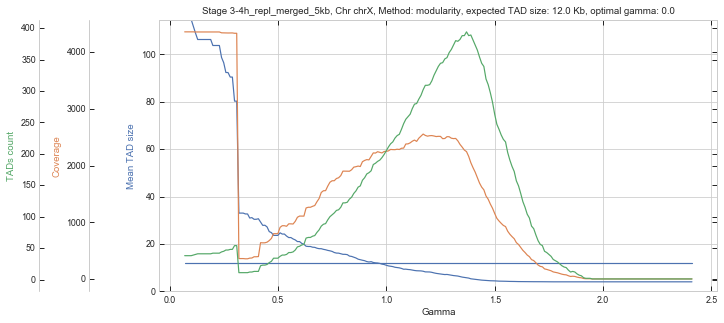

In [29]:
viz_opt_curves(TADs_df, TADs_df_opt, method='modularity', chromnames=['chrX'], expected_mts=60000/5000, stage='3-4h_repl_merged_5kb')



### Visualize TADs:

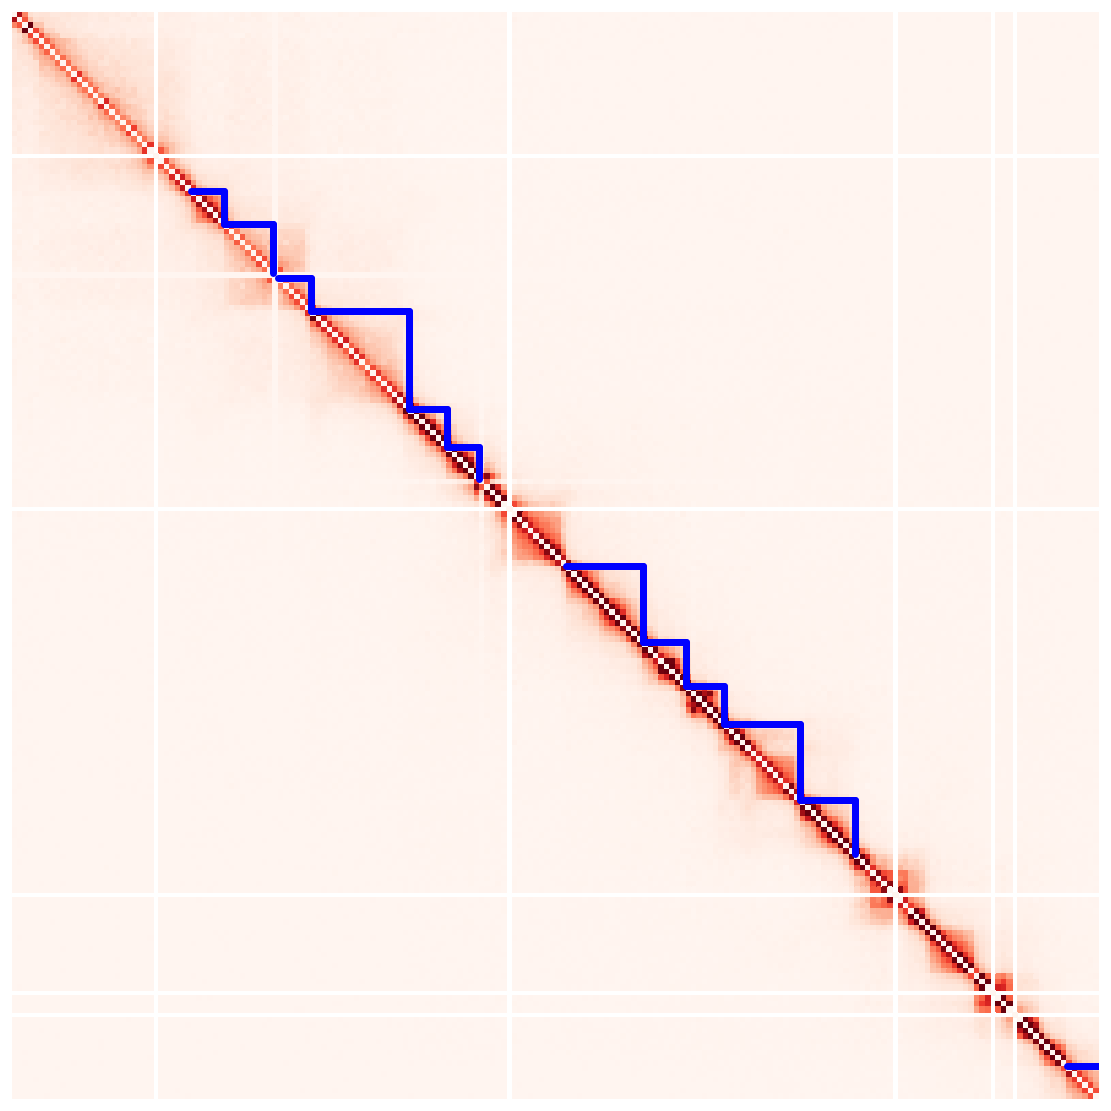

In [30]:
viz_tads(TADs_df_opt, matrices, begin=300, end=500, ch='chrX', exp='3-4h_repl_merged_5kb', 
         resolution=5000, is_insulation=False, percentile=99.99)

### Compute D-scores:

In [59]:
stages_embryo = ['nuclear_cycle_12_repl_merged_5kb', 'nuclear_cycle_13_repl_merged_5kb', 'nuclear_cycle_14_repl_merged_5kb', '3-4h_repl_merged_5kb']

In [60]:
TADs_scores = d_scores(TADs_df_opt, matrices, stages=stages_embryo)

INFO:root:COMPUTE|D_SCORES| Start computing D-scores...
INFO:root:COMPUTE|D_SCORES| Complete computing D-scores in 0m 0s


In [61]:
TADs_scores.head()

,bgn,end,gamma,method,ch,length,D_nuclear_cycle_12_repl_merged_5kb,D_nuclear_cycle_13_repl_merged_5kb,D_nuclear_cycle_14_repl_merged_5kb,D_3-4h_repl_merged_5kb
0,96,106,0.95,armatus,chrX,10,0.270469,0.270005,0.398682,0.576868
1,106,124,0.95,armatus,chrX,18,0.414958,0.444702,0.652615,0.915793
2,124,131,0.95,armatus,chrX,7,0.215788,0.222562,0.373411,0.452505
3,131,137,0.95,armatus,chrX,6,0.165757,0.156999,0.221934,0.381528
4,137,153,0.95,armatus,chrX,16,0.349027,0.316128,0.445321,0.714625


### Normalize D-scores:

In [62]:
TADs_scores_norm = normalize(TADs_scores, ['D_{}'.format(x) for x in stages_embryo], type_norm='log-row')

In [63]:
TADs_scores_norm.head()

,bgn,end,gamma,method,ch,length,D_nuclear_cycle_12_repl_merged_5kb,D_nuclear_cycle_13_repl_merged_5kb,D_nuclear_cycle_14_repl_merged_5kb,D_3-4h_repl_merged_5kb,norm_D_nuclear_cycle_12_repl_merged_5kb,norm_D_nuclear_cycle_13_repl_merged_5kb,norm_D_nuclear_cycle_14_repl_merged_5kb,norm_D_3-4h_repl_merged_5kb
0,96,106,0.95,armatus,chrX,10,0.270469,0.270005,0.398682,0.576868,0.000464,0.000000,0.121046,0.267630
1,106,124,0.95,armatus,chrX,18,0.414958,0.444702,0.652615,0.915793,0.000000,0.029310,0.213219,0.406021
2,124,131,0.95,armatus,chrX,7,0.215788,0.222562,0.373411,0.452505,0.000000,0.006751,0.146368,0.212460
3,131,137,0.95,armatus,chrX,6,0.165757,0.156999,0.221934,0.381528,0.008720,0.000000,0.062914,0.202557
4,137,153,0.95,armatus,chrX,16,0.349027,0.316128,0.445321,0.714625,0.032370,0.000000,0.121504,0.335398


### Call clusters:

In [71]:
TADs_clustering = clusters(TADs_scores_norm, ['norm_D_{}'.format(x) for x in stages_embryo], 
                                 method='kmeans', n_clusters=3)

In [72]:
TADs_clustering.head()

,bgn,end,gamma,method,ch,length,D_nuclear_cycle_12_repl_merged_5kb,D_nuclear_cycle_13_repl_merged_5kb,D_nuclear_cycle_14_repl_merged_5kb,D_3-4h_repl_merged_5kb,norm_D_nuclear_cycle_12_repl_merged_5kb,norm_D_nuclear_cycle_13_repl_merged_5kb,norm_D_nuclear_cycle_14_repl_merged_5kb,norm_D_3-4h_repl_merged_5kb,cluster_kmeans
0,96,106,0.95,armatus,chrX,10,0.270469,0.270005,0.398682,0.576868,0.000464,0.000000,0.121046,0.267630,2
1,106,124,0.95,armatus,chrX,18,0.414958,0.444702,0.652615,0.915793,0.000000,0.029310,0.213219,0.406021,2
2,124,131,0.95,armatus,chrX,7,0.215788,0.222562,0.373411,0.452505,0.000000,0.006751,0.146368,0.212460,1
3,131,137,0.95,armatus,chrX,6,0.165757,0.156999,0.221934,0.381528,0.008720,0.000000,0.062914,0.202557,1
4,137,153,0.95,armatus,chrX,16,0.349027,0.316128,0.445321,0.714625,0.032370,0.000000,0.121504,0.335398,2


### Evaluate clustering:

In [73]:
silhouette(TADs_clustering, ['norm_D_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

0.4102839790631701

### Visualize clusters:

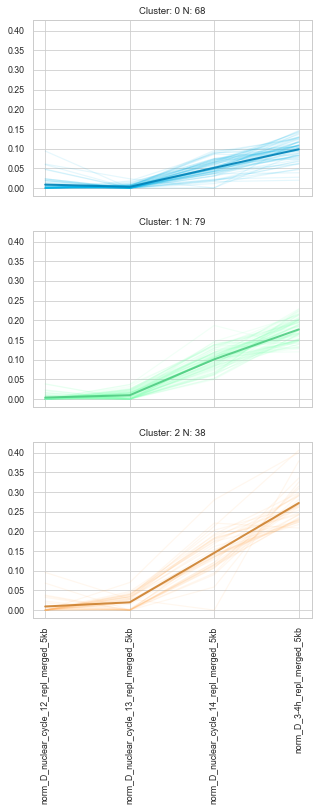

In [74]:
colors = clusters_dynamics(TADs_clustering, ['norm_D_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

INFO:root:PLOT|PCA| Explained variation per principal component: [0.83687666 0.13664713 0.01849878]


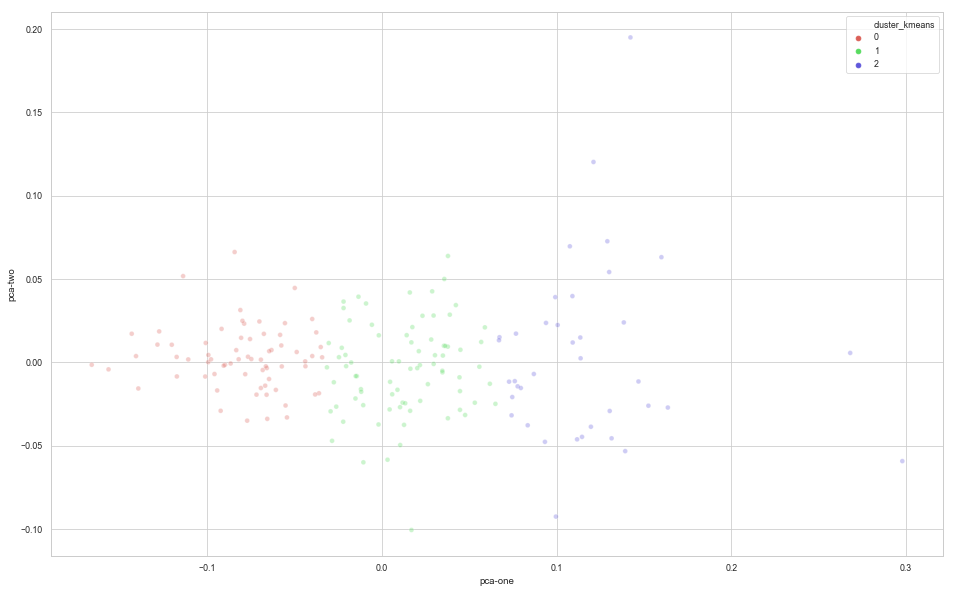

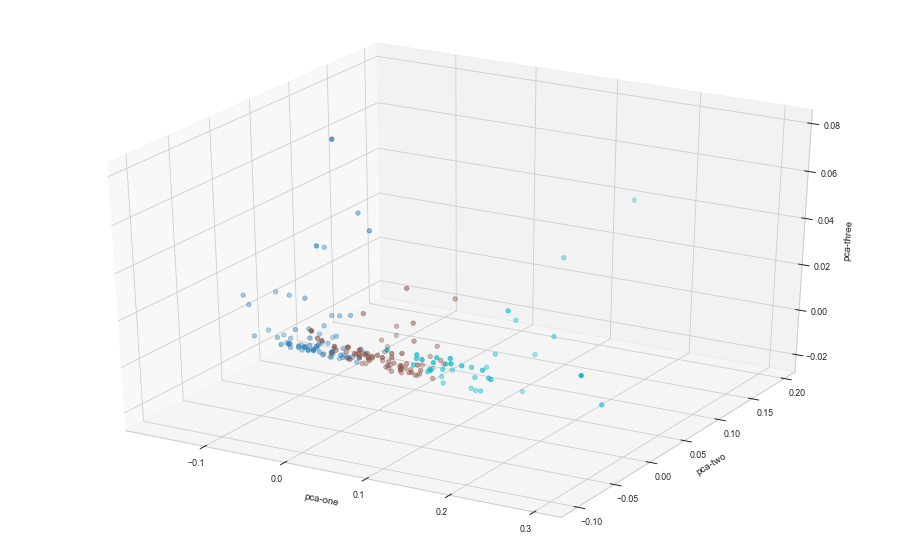

In [75]:
_pca(TADs_clustering, ['norm_D_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

INFO:root:PLOT|TSNE| t-SNE done! Time elapsed: 0.6152117252349854 seconds


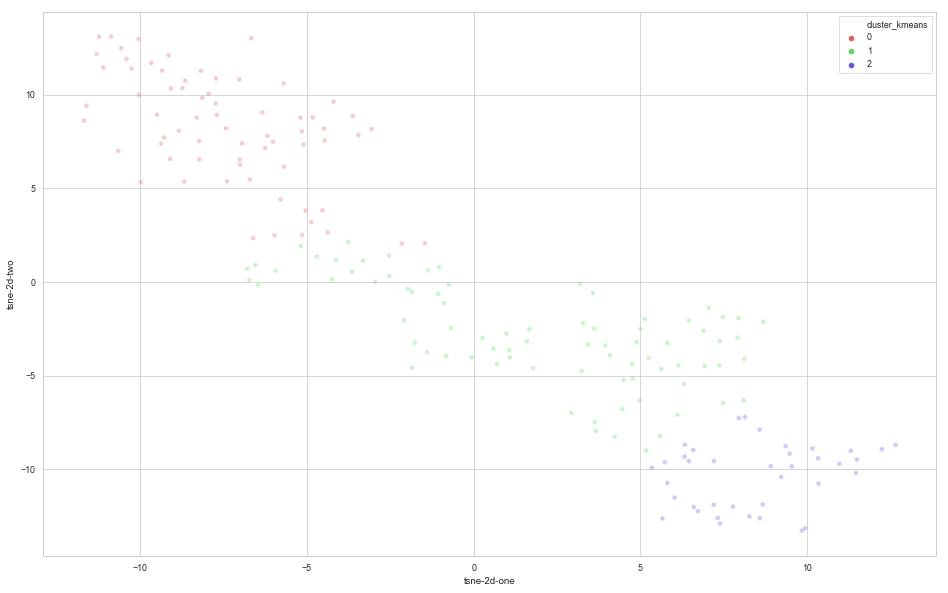

In [76]:
_tsne(TADs_clustering, ['norm_D_{}'.format(x) for x in stages_embryo], 'cluster_kmeans')

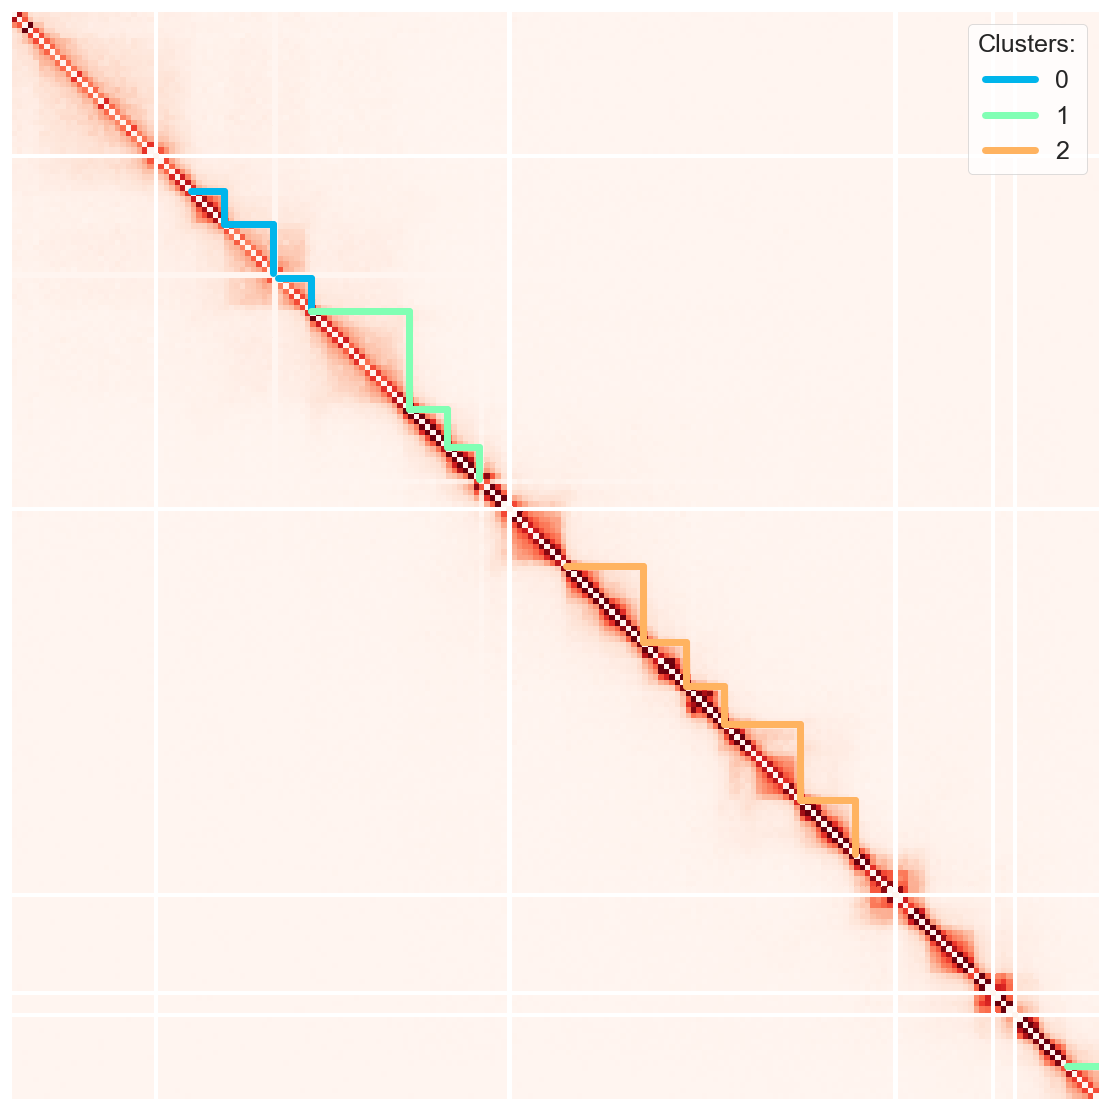

In [77]:
viz_tads(TADs_clustering, matrices, begin=300, end=500, ch='chrX', exp='3-4h_repl_merged_5kb', 
         resolution=5000, method='kmeans', is_insulation=False, clusters=True, colors=colors, percentile=99.99)